In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from mlops_hw1.data.make_dataset import read_data

In [3]:
df  = read_data('../../data/heart_cleveland_upload.csv')
df.shape

(297, 14)

In [58]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [59]:
# Сортировка колонок по количеству уникальных значений
lst = []
for column in df.columns:
    lst.append((column, len(df.loc[:, [column]].value_counts())))

lst.sort(key=lambda x: x[1])
np.array(lst)

array([['sex', '2'],
       ['fbs', '2'],
       ['exang', '2'],
       ['condition', '2'],
       ['restecg', '3'],
       ['slope', '3'],
       ['thal', '3'],
       ['cp', '4'],
       ['ca', '4'],
       ['oldpeak', '40'],
       ['age', '41'],
       ['trestbps', '50'],
       ['thalach', '91'],
       ['chol', '152']], dtype='<U21')

## Categorical features:

#### 1. sex: пол (1 = male; 0 = female)
#### 2. fbs: (уровень сахара в крови натощак > 120 мг/дл) (1 = верно; 0 = неверно)
#### 3. restecg: результаты электрокардиографии в состоянии покоя (0 =  нормальное, 1 =  наличие аномалии, 2 = гипертрофия левого желудочка)
#### 4. exang: стенокардия, вызванная физической нагрузкой (1 = да; 0 = нет)
#### 5. slope
#### 6. thal
#### 7. cp: тип боли в груди
#### 8. ca: количество крупных сосудов (0-3), окрашенных при флюороскопии

## Continious features:

#### 1. trestbps: артериальное давление в покое (в мм рт. ст. при поступлении в больницу) 
#### 2. chol: холестерин в сыворотке в мг/дл
#### 3. thalach: максимальная частота сердечных сокращений
#### 4. oldpeak
#### 5. age: возраст

## Target

#### 1. condition: (0 = нет болезни; 1 = болезнь)

In [60]:
# st = set(['age', 'oldpeak', 'ca', 'thalach', 'chol',
#      'trestbps', 'condition', 'sex', 'fbs', 'restecg',
#      'exang', 'slope', 'thal', 'cp'])
# st == set(list(np.array(lst)[:, 0]))

True

In [248]:
keys, values = list(map(str, df.condition.value_counts().index)), df.condition.value_counts().values

fig = px.bar(x=keys, y=values, color=keys,
             color_discrete_sequence=px.colors.sequential.Blues,
             title='Distribution of target value')

fig.update_layout(xaxis_title="target", yaxis_title="amount")

fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "blue"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "red"

fig.show();

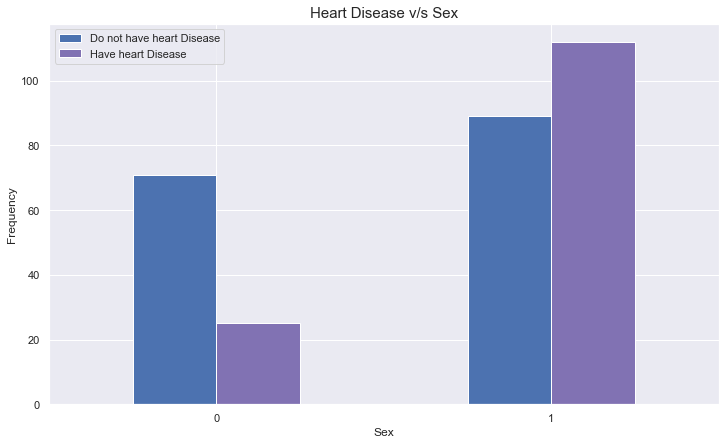

In [249]:
sns.set(style="darkgrid")
pd.crosstab(df.sex,df.condition).plot(kind="bar", figsize=(12, 7), color=['b','m'])
plt.title('Heart Disease v/s Sex', fontsize=15)
plt.legend(["Do not have heart Disease", "Have heart Disease"])
plt.xlabel('Sex',fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(rotation=0)
plt.show()

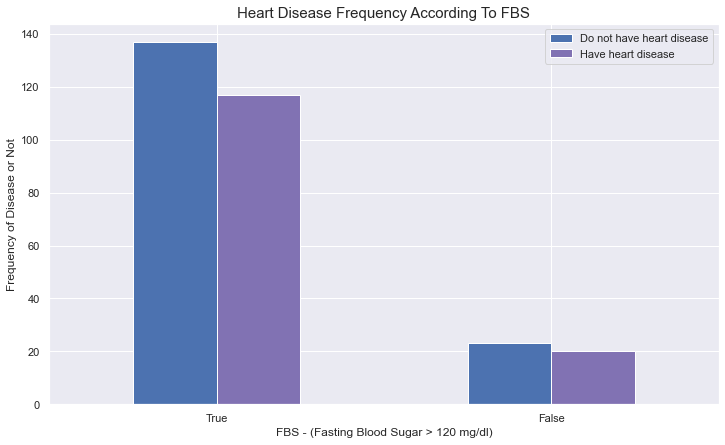

In [250]:
sns.set(style="darkgrid")
pd.crosstab(df.fbs, df.condition).plot(kind="bar", figsize=(12, 7), color=["b", "m"], ax=plt.gca())
plt.title("Heart Disease Frequency According To FBS", fontsize=15)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("FBS - (Fasting Blood Sugar > 120 mg/dl)",fontsize=12)
plt.gca().set_xticklabels(labels=["True", "False"])
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not",fontsize=12)
plt.show()


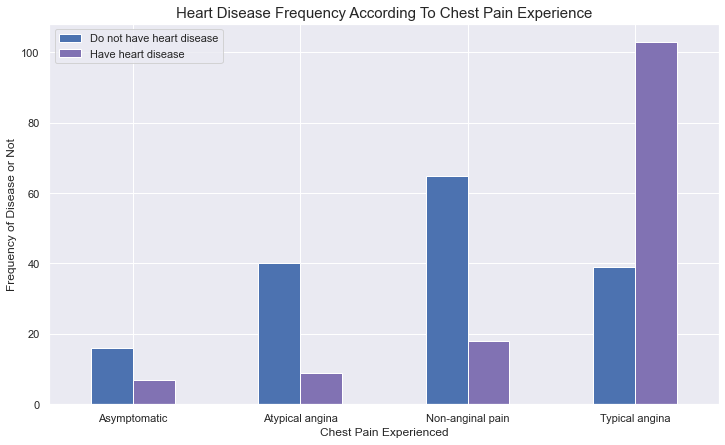

In [251]:
sns.set(style="darkgrid")
pd.crosstab(df.cp, df.condition).plot(kind="bar", figsize=(12, 7), color=["b", "m"], ax=plt.gca())
plt.title("Heart Disease Frequency According To Chest Pain Experience",fontsize=15)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Chest Pain Experienced",fontsize=12)
plt.gca().set_xticklabels(
    labels=["Asymptomatic","Atypical angina","Non-anginal pain","Typical angina"]
)
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not",fontsize=12)
plt.show()

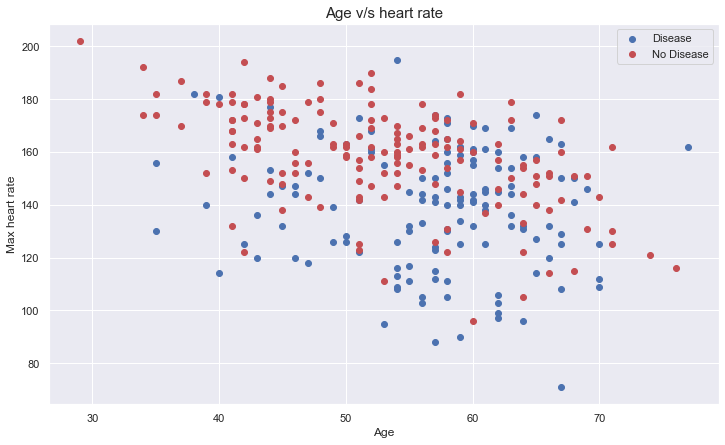

In [252]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,7))

plt.scatter(df.age[df.condition==1], df.thalach[df.condition==1], color='b')
plt.scatter(df.age[df.condition==0], df.thalach[df.condition==0], color='r')

plt.title('Age v/s heart rate',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Max heart rate',fontsize=12)
plt.legend(['Disease','No Disease']);

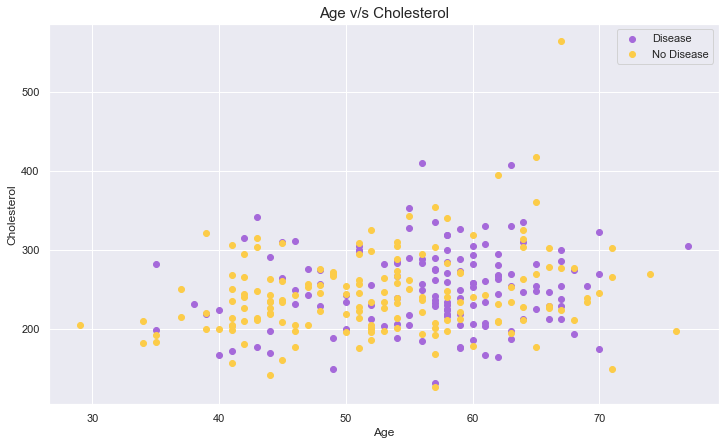

In [253]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,7))

plt.scatter(df.age[df.condition==1], df.chol[df.condition==1],color='#A569DA')
plt.scatter(df.age[df.condition==0], df.chol[df.condition==0],color='#FCCC49')

plt.title('Age v/s Cholesterol',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Cholesterol',fontsize=12)
plt.legend(['Disease','No Disease']);


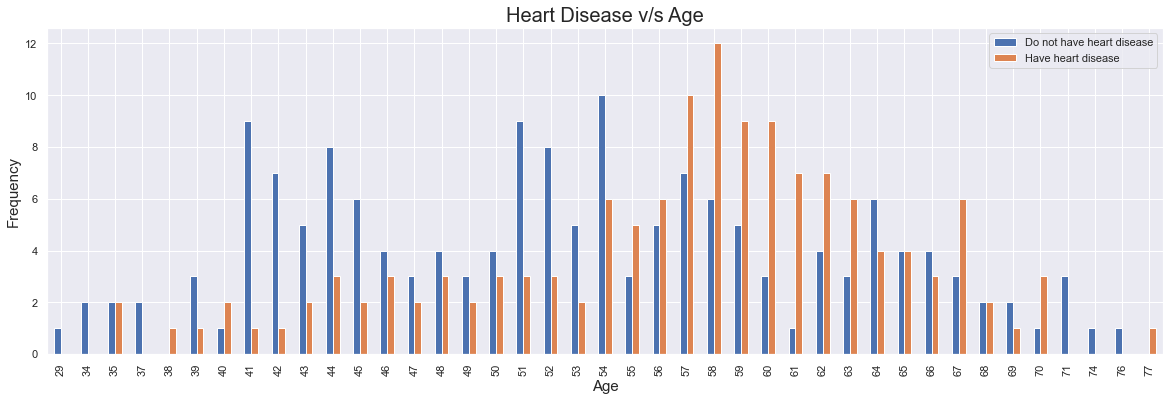

In [254]:
sns.set(style="darkgrid")
pd.crosstab(df.age, df.condition).plot(kind="bar", figsize=(20, 6), ax=plt.gca())
plt.title("Heart Disease v/s Age",fontsize=20)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()


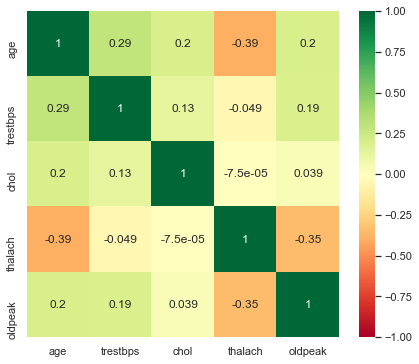

In [255]:
corr = df[['age','trestbps','chol','thalach','oldpeak']].corr()
plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap="RdYlGn")
plt.show()

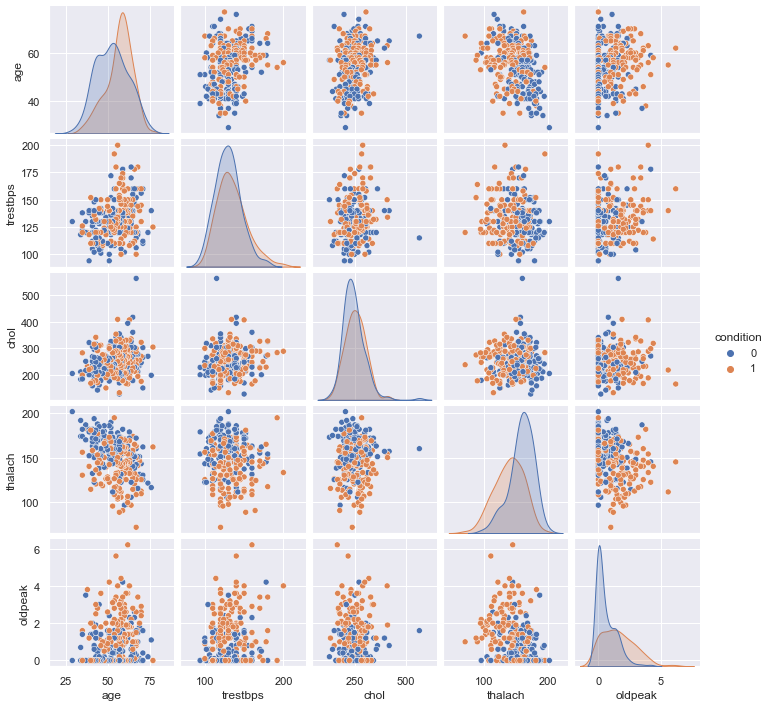

In [256]:
sns.set(style="darkgrid")
sns.pairplot(df[['age','trestbps','chol','thalach','oldpeak']+['condition']], hue='condition', height=2)
plt.show()

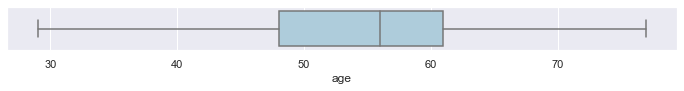

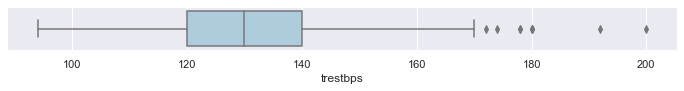

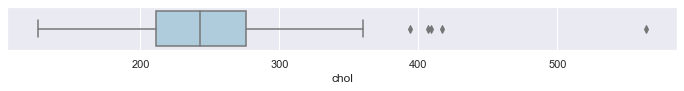

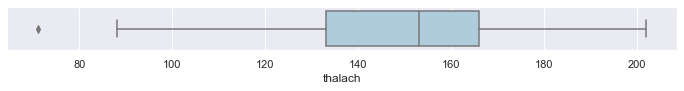

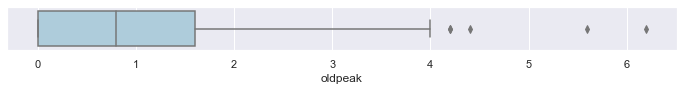

In [257]:
df2=df[['age','trestbps','chol','thalach','oldpeak']]
for column in df2:
        plt.figure(figsize=(12,0.8))
        sns.boxplot(data=df2, x=column, palette="Paired")

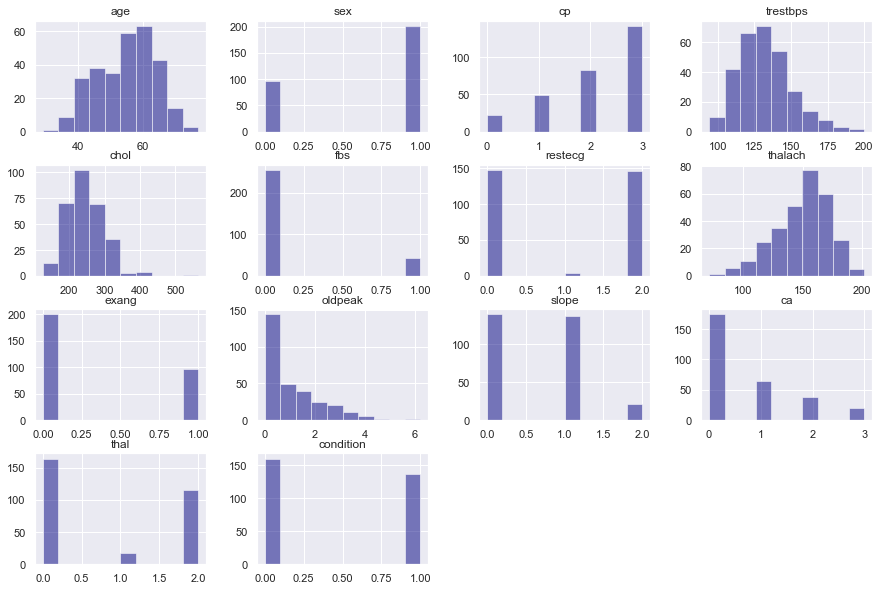

In [258]:
sns.set(style="darkgrid")
df.hist(bins=10, figsize=(15,10) ,color = 'navy', alpha = 0.5)
plt.show()